# Table of content

1. [Import libraries](#imports)
2. [Data Exploration](#dataexploration)
3. [Data cleaning](#datacleaning)
4. [Data preparation](#datapreparation)
5. [Benchmark model](#benchmarkmodel)
6. [Feature engineering](#featureengineering)
7. [Weather related data](#weatherdata)

## Import libraries <a id = "imports"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
taxi_jan_2019 = pd.read_parquet('data/yellow_tripdata_2019-01.parquet')
taxi_data = pd.concat([taxi_jan_2019])

## Data Exploration
<a id = "dataExploration"></a>

In [3]:
taxi_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [4]:
taxi_data = taxi_data[['tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID','PULocationID',
       'DOLocationID', 'payment_type',  'total_amount']]

In [5]:
taxi_data.columns

Index(['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count',
       'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'payment_type', 'total_amount'],
      dtype='object')

array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'RatecodeID'}>,
        <Axes: title={'center': 'PULocationID'}>],
       [<Axes: title={'center': 'DOLocationID'}>,
        <Axes: title={'center': 'payment_type'}>,
        <Axes: title={'center': 'total_amount'}>]], dtype=object)

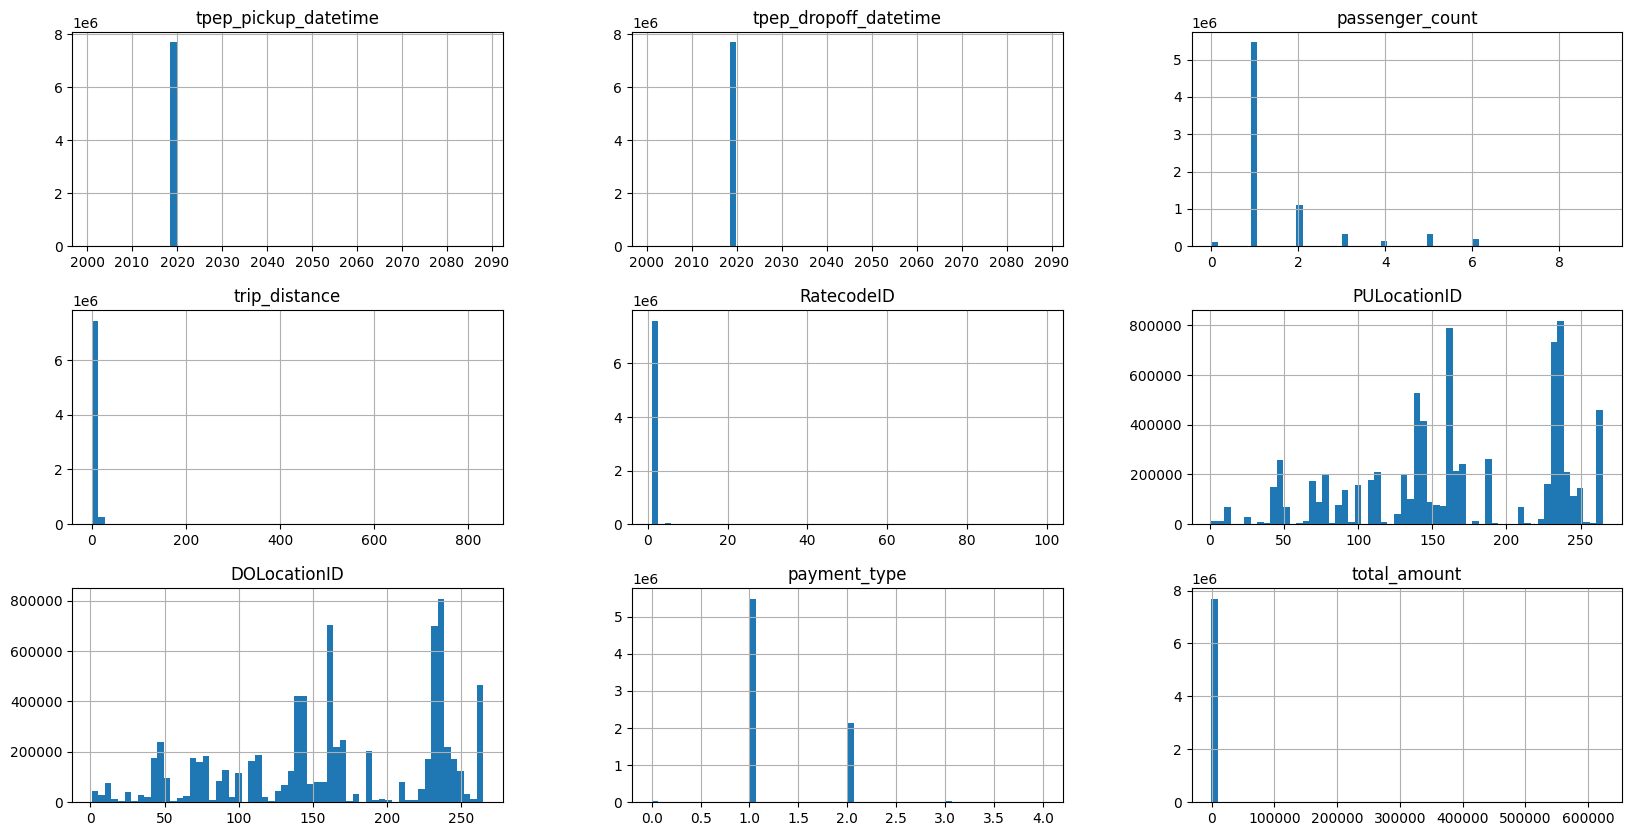

In [6]:
taxi_data.hist(figsize=(20,10), bins=60)

In [7]:
taxi_data['RatecodeID'].value_counts()

RatecodeID
1.0     7430288
2.0      166093
5.0       54570
3.0       11801
4.0        4895
99.0        252
6.0          46
Name: count, dtype: int64

<Axes: xlabel='index', ylabel='total_amount'>

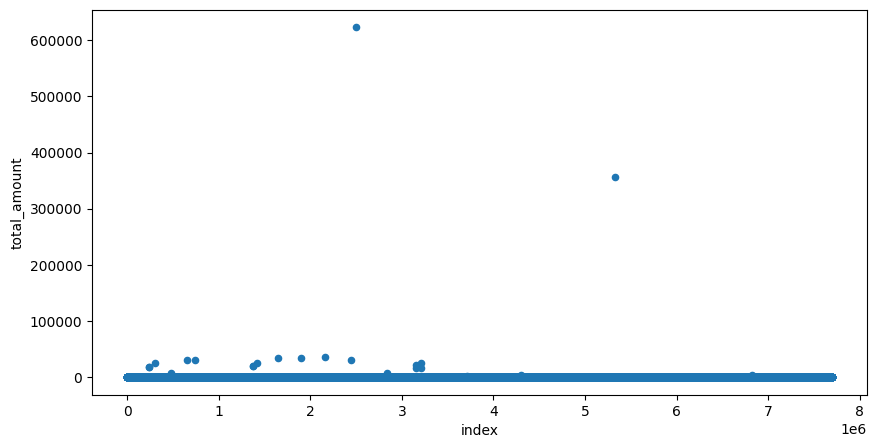

In [9]:
taxi_data.reset_index().plot(kind = "scatter", y = "total_amount", x = "index", figsize = (10,5))

<Axes: xlabel='index', ylabel='total_amount'>

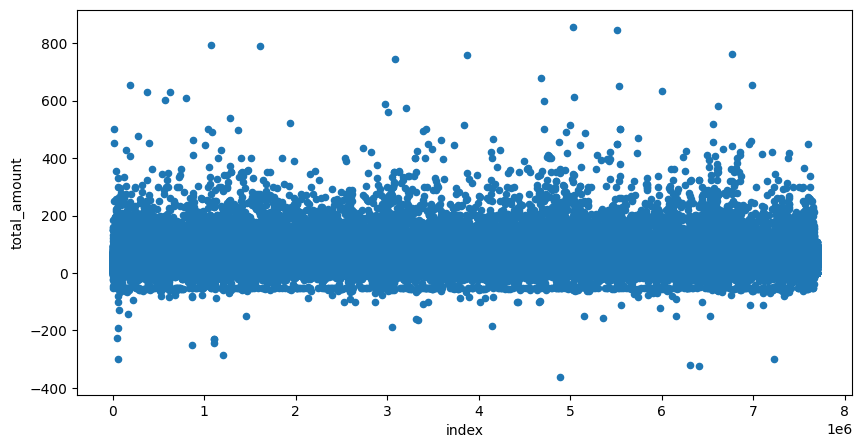

In [10]:
taxi_data[taxi_data["total_amount"]<=1000].reset_index().plot(kind = "scatter", y = "total_amount", x = "index", figsize = (10,5))

Two things to deal with: negative values and very high values. Let's first look at negative values.

(7127, 9)


<Axes: xlabel='index', ylabel='total_amount'>

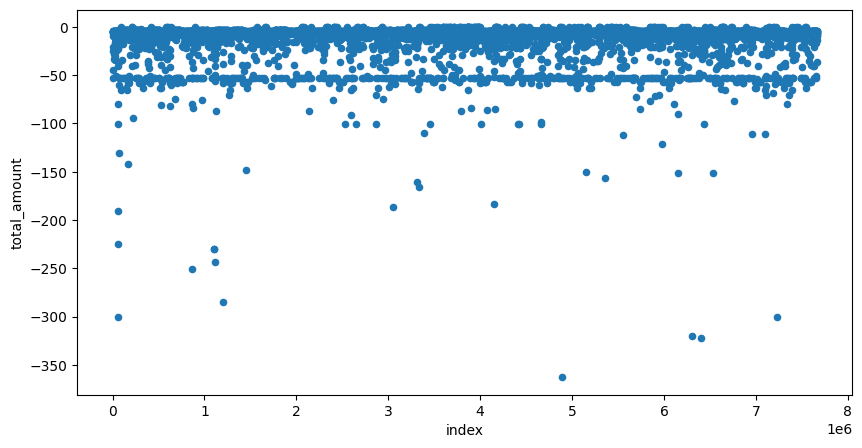

In [11]:
print(taxi_data[taxi_data["total_amount"]<0].shape)
taxi_data[taxi_data["total_amount"]<0].reset_index().plot(kind = "scatter", y = "total_amount", x = "index", figsize = (10,5))

In [8]:
taxi_data[taxi_data["total_amount"]<0].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
663,2019-01-01 00:32:56,2019-01-01 00:33:35,2.0,0.10,1.0,148,148,3,-3.8
2402,2019-01-01 00:14:18,2019-01-01 00:40:55,1.0,4.13,1.0,170,238,4,-20.3
2541,2019-01-01 00:31:27,2019-01-01 00:42:39,1.0,1.35,1.0,162,234,4,-9.8
2544,2019-01-01 00:45:57,2019-01-01 00:46:07,1.0,0.00,1.0,234,234,4,-3.8
2547,2019-01-01 00:48:35,2019-01-01 00:49:59,1.0,0.16,1.0,234,234,4,-4.3


In [9]:
taxi_data[taxi_data['total_amount']<0]['payment_type'].value_counts()

payment_type
3    4083
4    2667
2     376
1       1
Name: count, dtype: int64

<Axes: >

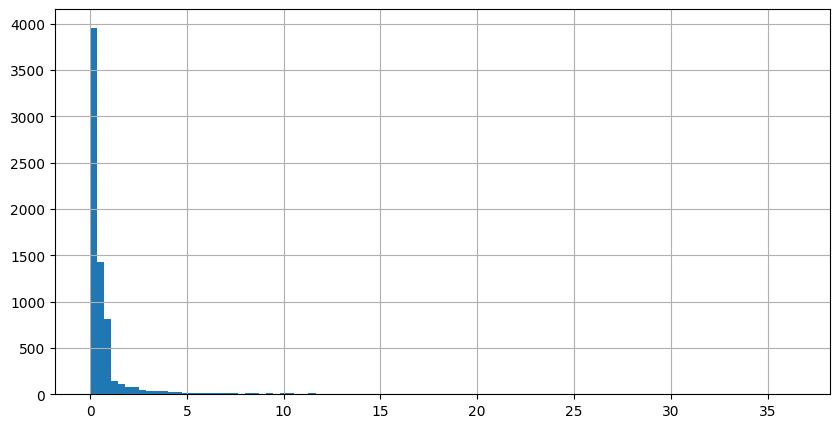

In [14]:
taxi_data[taxi_data['total_amount']<0]['trip_distance'].hist(bins = 100, figsize = (10,5))

In [10]:
print(taxi_data[taxi_data['total_amount']==0].shape)
taxi_data[taxi_data['total_amount']==0].head()

(1643, 9)


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
3552,2019-01-01 00:18:46,2019-01-01 00:18:46,1.0,0.0,5.0,186,264,2,0.0
9138,2019-01-01 00:41:47,2019-01-01 00:41:47,1.0,0.0,5.0,246,264,2,0.0
13256,2019-01-01 00:19:38,2019-01-01 00:20:35,1.0,0.0,1.0,193,193,1,0.0
13257,2019-01-01 00:43:34,2019-01-01 00:43:34,1.0,0.0,1.0,7,7,2,0.0
13258,2019-01-01 00:02:52,2019-01-01 00:02:52,1.0,0.0,1.0,264,7,2,0.0


In [11]:
taxi_data[taxi_data['total_amount']==0]['payment_type'].value_counts()

payment_type
1    813
2    569
0    231
3     29
4      1
Name: count, dtype: int64

<Axes: >

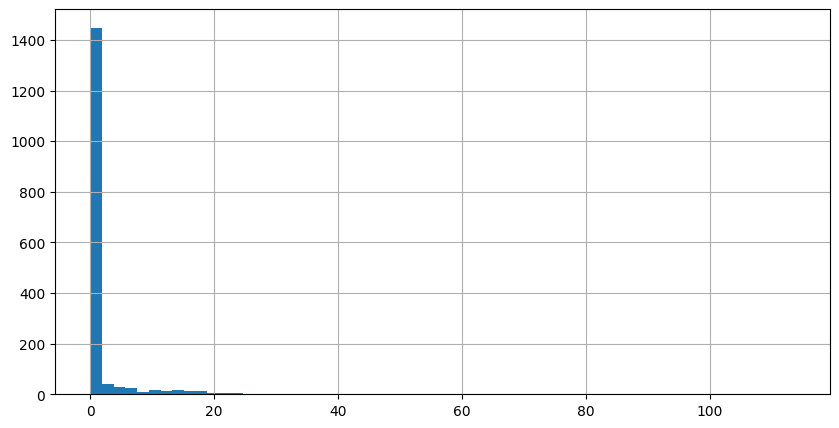

In [17]:
taxi_data[taxi_data['total_amount']==0]['trip_distance'].hist(bins=60, figsize=(10,5))

In [12]:
taxi_data[taxi_data['total_amount']==0]['trip_distance'].value_counts()

trip_distance
0.00     1323
0.03        9
0.01        8
0.06        6
1.00        4
         ... 
11.86       1
4.59        1
20.92       1
18.37       1
12.30       1
Name: count, Length: 256, dtype: int64

In [13]:
taxi_data[taxi_data['total_amount']>200].shape

(1166, 9)

In [14]:
taxi_data['total_amount'].mean()

15.810651344610214

## Data Cleaning
<a id = "datacleaning"></a>

In [15]:
#We remove record with total amount less than  and greater than 200.
taxi_data_filtered = taxi_data[(taxi_data["total_amount"]>=0) & (taxi_data["total_amount"]<200)]

In [16]:
print(taxi_data.shape)
print(taxi_data_filtered.shape)
print(f"we got rid of {taxi_data.shape[0] - taxi_data_filtered.shape[0]} record")

(7696617, 9)
(7688319, 9)
we got rid of 8298 record


In [17]:
#Checking for missing values
taxi_data_filtered.isna().sum()

tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          28672
trip_distance                0
RatecodeID               28672
PULocationID                 0
DOLocationID                 0
payment_type                 0
total_amount                 0
dtype: int64

In [18]:
#Replacing NaN values in passenger count with mean
##Replacing NaN values in RatecodeID with 1 as 1 means standard rate
taxi_data_filtered.loc[:, "passenger_count"] = taxi_data_filtered["passenger_count"].fillna(taxi_data_filtered["passenger_count"].mean())
taxi_data_filtered.loc[:,"RatecodeID"] = taxi_data_filtered["RatecodeID"].fillna(1)

In [19]:
taxi_data_filtered.isna().sum()

tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
total_amount             0
dtype: int64

## Data Preparation
<a id = "datapreparation"></a>

In [20]:
taxi_data_filtered.dtypes

tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
total_amount                    float64
dtype: object

In [21]:
taxi_data_prepared = taxi_data_filtered.copy()

In [22]:
taxi_data_prepared.loc[:,'tpep_pickup_datetime'] = pd.to_datetime(taxi_data_prepared.loc[:,'tpep_pickup_datetime'])
taxi_data_prepared.loc[:,'tpep_dropoff_datetime'] = pd.to_datetime(taxi_data_prepared.loc[:,'tpep_dropoff_datetime'])

In [23]:
taxi_data_prepared['passenger_count'] = taxi_data_prepared['passenger_count'].astype('int64')
taxi_data_prepared['RatecodeID']   = taxi_data_prepared['RatecodeID'].astype(str)
taxi_data_prepared['PULocationID'] = taxi_data_prepared['PULocationID'].astype(str)
taxi_data_prepared['DOLocationID'] = taxi_data_prepared['DOLocationID'].astype(str)
taxi_data_prepared['payment_type'] = taxi_data_prepared['payment_type'].astype(str)

In [24]:
taxi_data_prepared.dtypes

tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                   int64
trip_distance                   float64
RatecodeID                       object
PULocationID                     object
DOLocationID                     object
payment_type                     object
total_amount                    float64
dtype: object

We transormed the data into the required datatypes

In [25]:
taxi_data_prepared.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1.0,151,239,1,9.95
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1.0,239,246,1,16.30
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1.0,236,236,1,5.80
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1.0,193,193,2,7.55
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2.0,193,193,2,55.55


In [26]:
#We are adding date, day, month, year, and hour for the transaction
taxi_data_prepared['transaction_date'] = pd.to_datetime(taxi_data_prepared['tpep_pickup_datetime'].dt.date)
taxi_data_prepared['transaction_day'] = taxi_data_prepared['tpep_pickup_datetime'].dt.day
taxi_data_prepared['transaction_month'] = taxi_data_prepared['tpep_pickup_datetime'].dt.month
taxi_data_prepared['transaction_year'] = taxi_data_prepared['tpep_pickup_datetime'].dt.year
taxi_data_prepared['transaction_hour'] = taxi_data_prepared['tpep_pickup_datetime'].dt.hour
taxi_data_prepared.dtypes

tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                   int64
trip_distance                   float64
RatecodeID                       object
PULocationID                     object
DOLocationID                     object
payment_type                     object
total_amount                    float64
transaction_date         datetime64[ns]
transaction_day                   int32
transaction_month                 int32
transaction_year                  int32
transaction_hour                  int32
dtype: object

In [25]:
taxi_data_prepared.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,transaction_date,transaction_day,transaction_month,transaction_year,transaction_hour
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1.0,151,239,1,9.95,2019-01-01,1,1,2019,0
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1.0,239,246,1,16.30,2019-01-01,1,1,2019,0
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1.0,236,236,1,5.80,2018-12-21,21,12,2018,13
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1.0,193,193,2,7.55,2018-11-28,28,11,2018,15
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2.0,193,193,2,55.55,2018-11-28,28,11,2018,15


array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'total_amount'}>,
        <Axes: title={'center': 'transaction_date'}>],
       [<Axes: title={'center': 'transaction_day'}>,
        <Axes: title={'center': 'transaction_month'}>,
        <Axes: title={'center': 'transaction_year'}>],
       [<Axes: title={'center': 'transaction_hour'}>, <Axes: >, <Axes: >]],
      dtype=object)

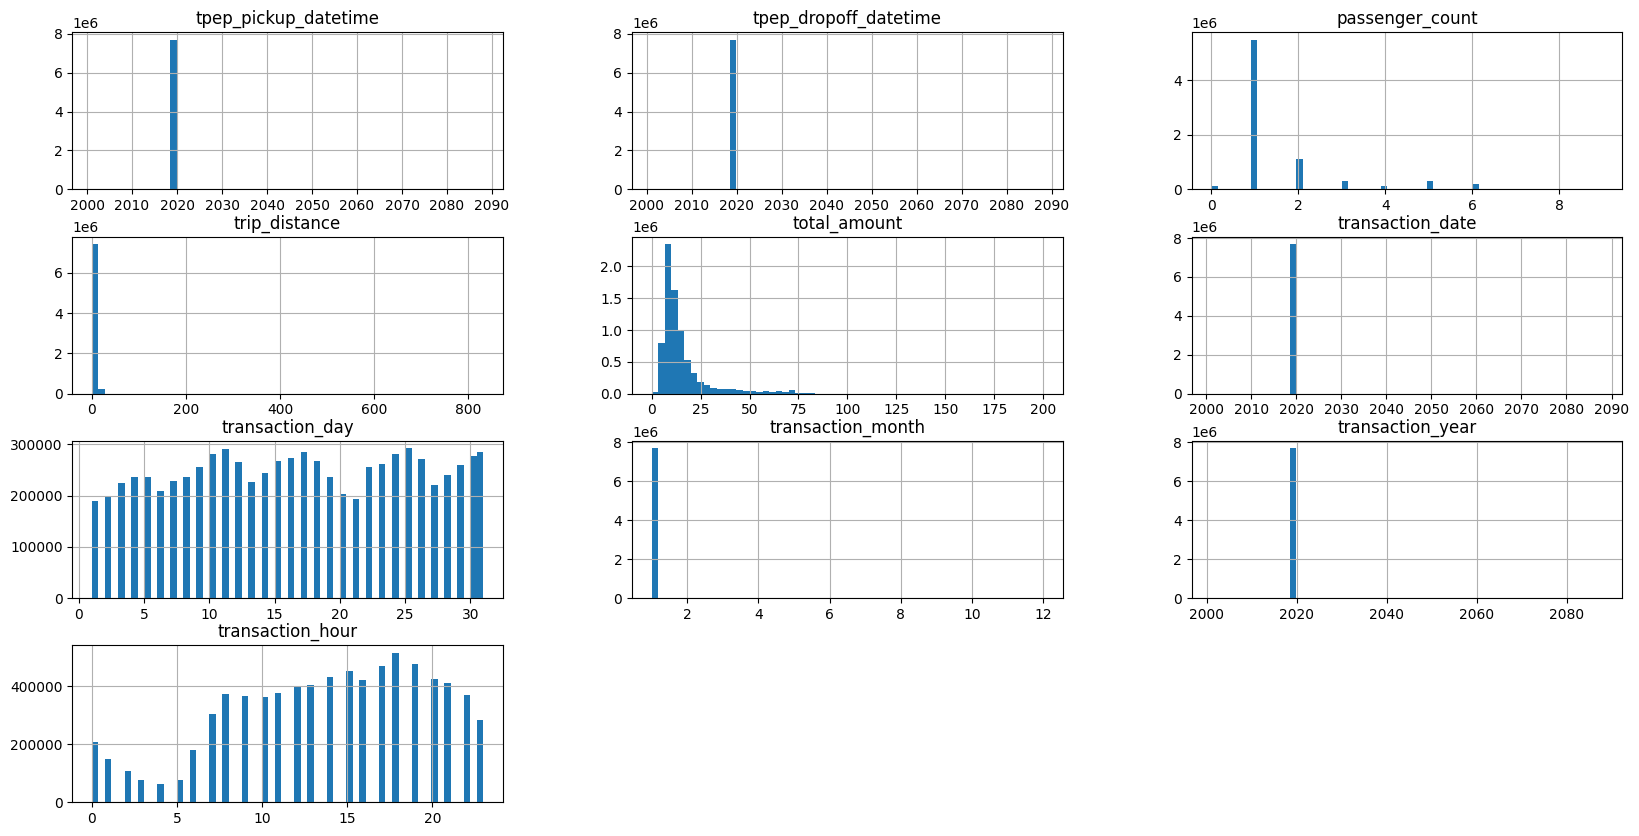

In [34]:
taxi_data_prepared.hist(bins = 60, figsize = (20,10))

In [27]:
#There are a few records with year and month not 2019 and january respectively, we must get rid of them
print(taxi_data_prepared["transaction_year"].value_counts())
print(taxi_data_prepared["transaction_month"].value_counts())

transaction_year
2019    7687877
2018        365
2009         50
2008         22
2003          2
2088          2
2001          1
Name: count, dtype: int64
transaction_month
1     7687837
12        377
2          73
11         10
4           6
7           6
3           5
6           2
5           1
8           1
9           1
Name: count, dtype: int64


In [28]:
taxi_data_prepared = taxi_data_prepared[(taxi_data_prepared['transaction_year'] == 2019) & (taxi_data_prepared['transaction_month'] == 1)]

In [29]:
#We only have data of 2019 and January month
print(taxi_data_prepared["transaction_year"].value_counts())
print(taxi_data_prepared["transaction_month"].value_counts())

transaction_year
2019    7687783
Name: count, dtype: int64
transaction_month
1    7687783
Name: count, dtype: int64


Noting down categorical and numerical columns

In [30]:
categorical_columns = ['PULocationID','transaction_date','transaction_month','transaction_day','transaction_hour']
numerical_columns = ['trip_distance','total_amount']
all_needed_columns = categorical_columns + numerical_columns

In [31]:
main_taxi_df = taxi_data_prepared[all_needed_columns]
print(main_taxi_df.shape)
main_taxi_df.head()

(7687783, 7)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount
0,151,2019-01-01,1,1,0,1.5,9.95
1,239,2019-01-01,1,1,0,2.6,16.30
7,163,2019-01-01,1,1,0,1.3,9.05
8,229,2019-01-01,1,1,0,3.7,18.50
9,141,2019-01-01,1,1,0,2.1,13.00


Aggregate data points

Now is a good time to think about what we want to predict. Depending on this, we need to transform our data to have a certain format.

In [32]:
taxi_grouped_by_region = main_taxi_df.groupby(categorical_columns).mean().reset_index()
taxi_grouped_by_region['count_of_transactions'] = main_taxi_df.groupby(categorical_columns).count().reset_index()['total_amount']
print(taxi_grouped_by_region.shape)
taxi_grouped_by_region.head()

(102713, 8)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2019-01-01,1,1,2,0.0,21.800,1
1,1,2019-01-01,1,1,5,0.0,87.300,1
2,1,2019-01-01,1,1,6,0.0,80.300,1
3,1,2019-01-01,1,1,8,0.0,128.580,2
4,1,2019-01-01,1,1,10,16.9,43.245,4


count    102713.000000
mean          4.776496
std           4.640478
min           0.000000
25%           2.049888
50%           2.960000
75%           5.618571
max         201.270000
Name: trip_distance, dtype: float64


<Axes: >

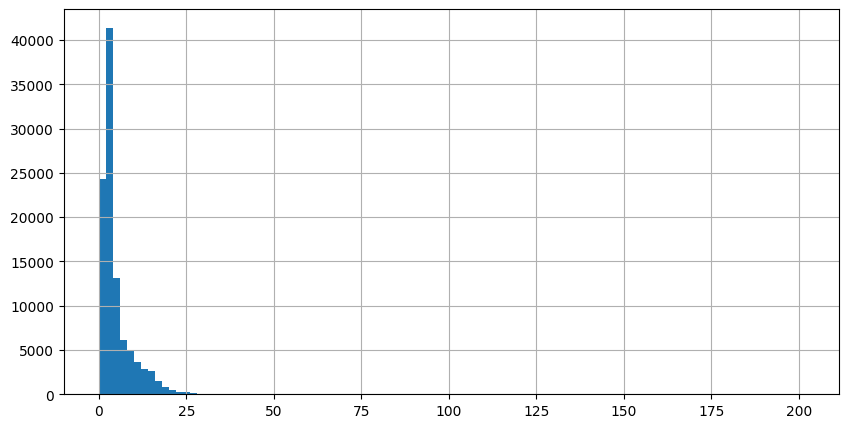

In [41]:
print(taxi_grouped_by_region['trip_distance'].describe())
taxi_grouped_by_region['trip_distance'].hist(bins=100, figsize=(10,5))

<Axes: >

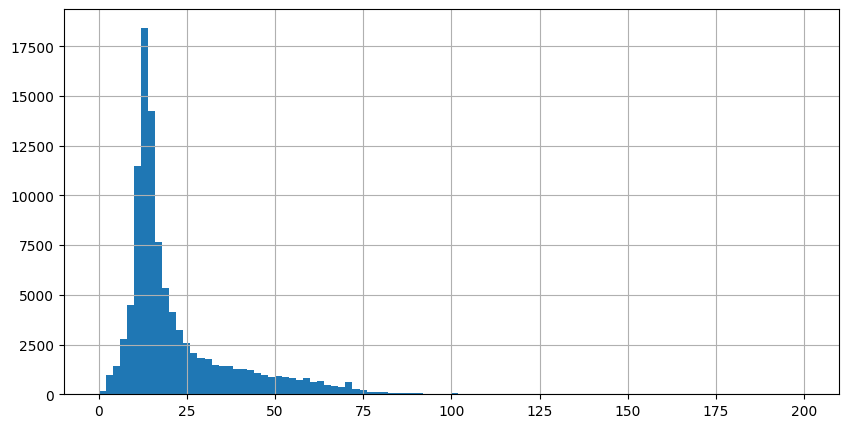

In [42]:
taxi_grouped_by_region['total_amount'].hist(bins=100, figsize=(10,5))

## 5.Benchmark Model

In [33]:
data_for_benchmark_model = taxi_grouped_by_region.copy()
data_for_benchmark_model

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2019-01-01,1,1,2,0.00,21.800,1
1,1,2019-01-01,1,1,5,0.00,87.300,1
2,1,2019-01-01,1,1,6,0.00,80.300,1
3,1,2019-01-01,1,1,8,0.00,128.580,2
4,1,2019-01-01,1,1,10,16.90,43.245,4
...,...,...,...,...,...,...,...,...
102708,98,2019-01-31,1,31,18,16.66,58.060,1
102709,99,2019-01-18,1,18,18,1.66,9.800,1
102710,99,2019-01-26,1,26,8,0.42,6.000,1
102711,99,2019-01-30,1,30,7,2.87,18.050,1


In [34]:
categorial_features_benchmark = ["PULocationID", "transaction_month", "transaction_day", "transaction_hour"]
input_features_benchmark = categorial_features_benchmark + ["trip_distance"]
target_features_benchmark = "total_amount"

## 5.1 Train Test Split

In [35]:
from sklearn.model_selection import train_test_split

X_bench = data_for_benchmark_model[input_features_benchmark]
y_bench = data_for_benchmark_model[target_features_benchmark]

# one-hot encode
X_bench = pd.get_dummies(X_bench)

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_bench, y_bench, test_size=0.33, random_state=42)

## 5.2 Fit a model to the data

In [36]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=10)
tree.fit(X_train_b, y_train_b)

DecisionTreeRegressor(max_depth=10)

## 5.3 Evaluate the model

In [37]:
model_at_hand = tree

y_pred_b = model_at_hand.predict(X_test_b)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print(f"mean absolute error {mean_absolute_error(y_test_b, y_pred_b)}")
print(f"mean squared error {mean_squared_error(y_test_b, y_pred_b)}")
print(f"root mean absolute error {sqrt(mean_squared_error(y_test_b, y_pred_b))}")
print(f"r2 score {r2_score(y_test_b, y_pred_b)}")

mean absolute error 3.375692872646449
mean squared error 60.3140033426225
root mean absolute error 7.766209071524053
r2 score 0.7950275844729459


<Axes: xlabel='actual', ylabel='predicted'>

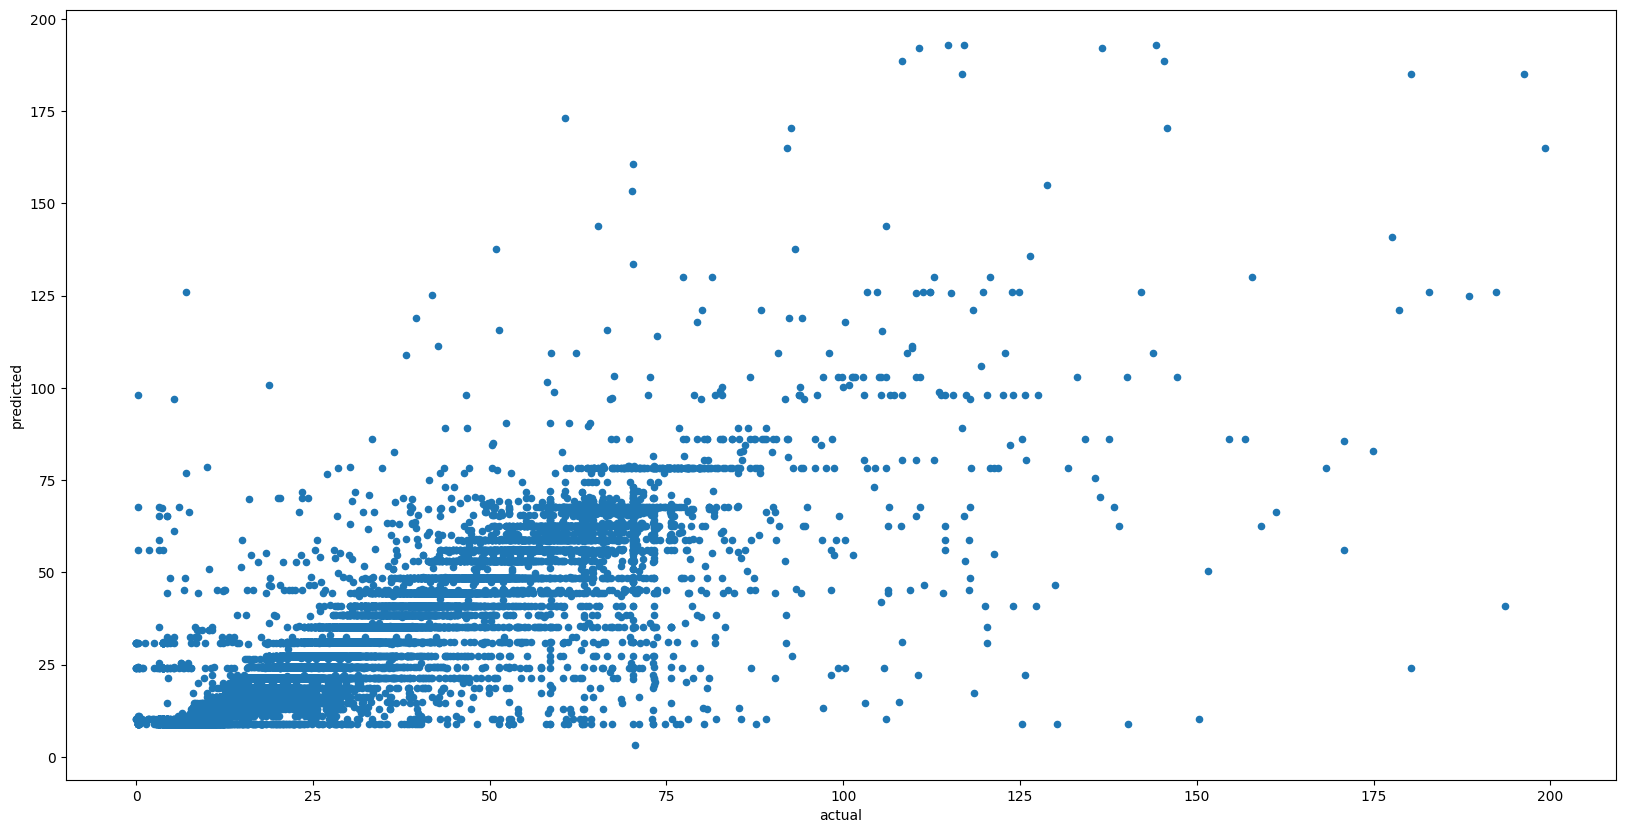

In [51]:
data = {"actual": y_test_b, "predicted": y_pred_b}
results = pd.DataFrame(data)

results.plot(kind = "scatter", x = "actual", y = "predicted", figsize = (20,10))

This is too good to be true

We are using trip_distance in the input feature which directly affects the price of the fare

Driver doesn't know what would be the trip distance before he gets the ride

In [38]:
#We do the model training again without including trip_distance in the input feature

categorial_features_benchmark = ["PULocationID", "transaction_month", "transaction_day", "transaction_hour"]
input_features_benchmark = categorial_features_benchmark
target_features_benchmark = "total_amount"

X_bench = data_for_benchmark_model[input_features_benchmark]
y_bench = data_for_benchmark_model[target_features_benchmark]

# one-hot encode
X_bench = pd.get_dummies(X_bench)

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_bench, y_bench, test_size=0.33, random_state=42)

tree = DecisionTreeRegressor(max_depth=10)
tree.fit(X_train_b, y_train_b)

model_at_hand = tree

y_pred_b = model_at_hand.predict(X_test_b)

print(f"mean absolute error {mean_absolute_error(y_test_b, y_pred_b)}")
print(f"mean squared error {mean_squared_error(y_test_b, y_pred_b)}")
print(f"root mean absolute error {sqrt(mean_squared_error(y_test_b, y_pred_b))}")
print(f"r2 score {r2_score(y_test_b, y_pred_b)}")

mean absolute error 10.706537101412417
mean squared error 241.34928109032333
root mean absolute error 15.53542020964748
r2 score 0.17979337485226587


<Axes: xlabel='actual', ylabel='predicted'>

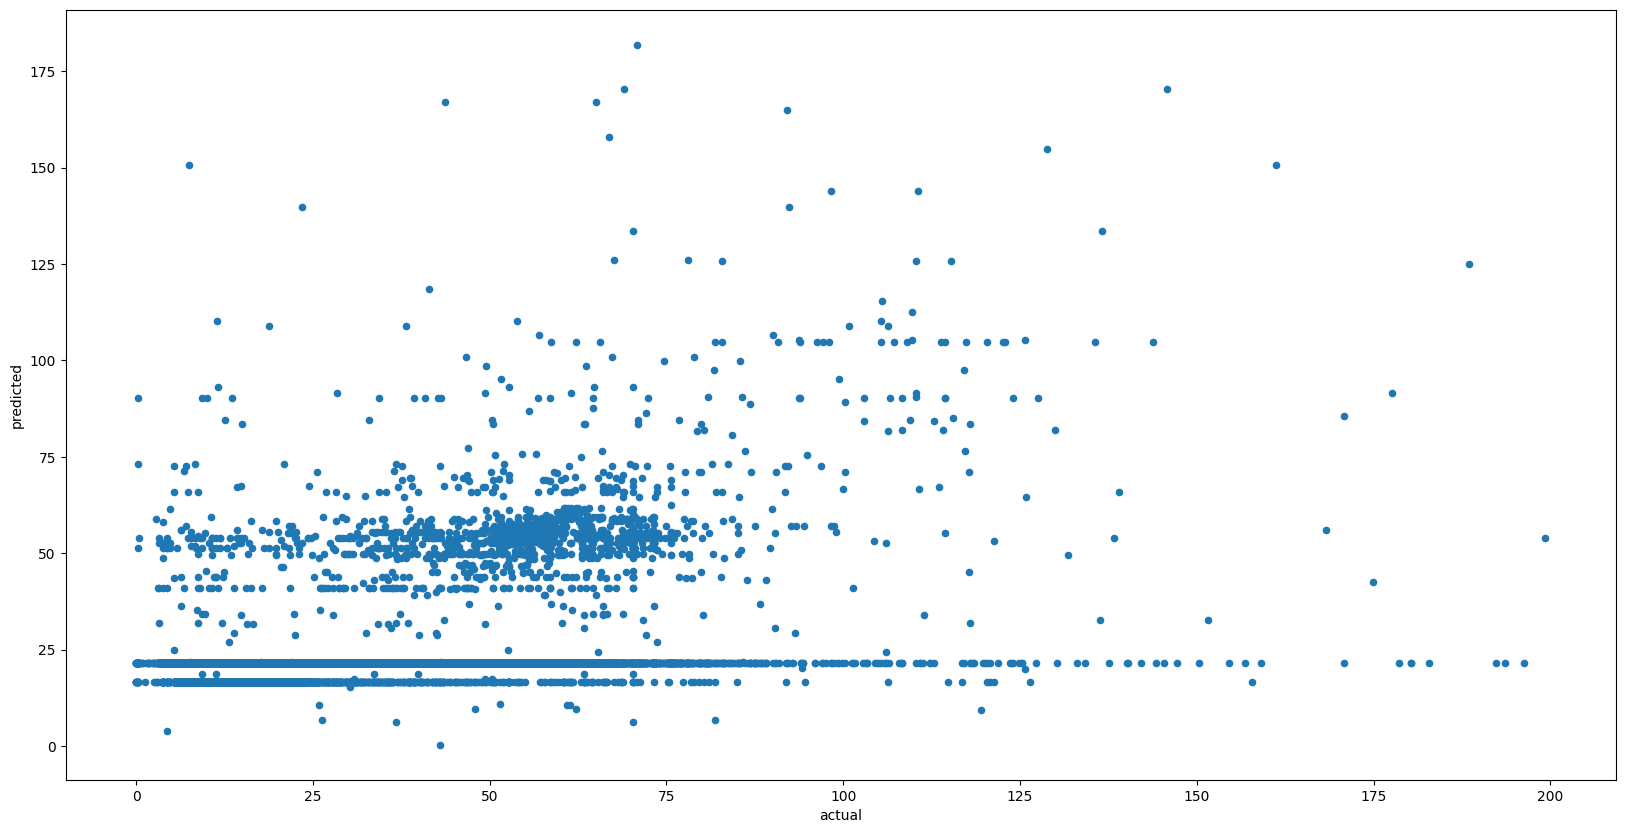

In [39]:
data = {"actual": y_test_b, "predicted": y_pred_b}
results = pd.DataFrame(data)

results.plot(kind = "scatter", x = "actual", y = "predicted", figsize = (20,10))

## 5.Benchmark Model

In [41]:
taxi_grouped_by_region.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2019-01-01,1,1,2,0.0,21.800,1
1,1,2019-01-01,1,1,5,0.0,87.300,1
2,1,2019-01-01,1,1,6,0.0,80.300,1
3,1,2019-01-01,1,1,8,0.0,128.580,2
4,1,2019-01-01,1,1,10,16.9,43.245,4


In [42]:
data_with_new_features = taxi_grouped_by_region.copy()

In [43]:
data_with_new_features['transaction_week_day'] = data_with_new_features['transaction_date'].dt.weekday
data_with_new_features['weekend'] = data_with_new_features['transaction_week_day'].apply(lambda x: True if x == 5 or x == 6 else False)

In [44]:
from pandas.tseries.holiday import USFederalHolidayCalendar

cal = USFederalHolidayCalendar()
holidays = cal.holidays(start='2018',
                        end='2020').date
data_with_new_features['is_holiday'] = data_with_new_features['transaction_date'].isin(holidays)

C:\Users\Dhruvesh\AppData\Local\Temp\ipykernel_14380\2463167083.py:6: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  data_with_new_features['is_holiday'] = data_with_new_features['transaction_date'].isin(holidays)


In [45]:
data_with_new_features.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False,True
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False,True
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False,True
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False,True
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False,True


In [46]:
zone_lookup = pd.read_csv("data/taxi_zone_lookup.csv")
zone_lookup = zone_lookup[["LocationID","Borough"]]
zone_lookup['LocationID'] = zone_lookup['LocationID'].astype(str)
zone_lookup['LocationID'].value_counts()

LocationID
1      1
183    1
169    1
170    1
171    1
      ..
95     1
96     1
97     1
98     1
265    1
Name: count, Length: 265, dtype: int64

In [47]:
data_with_new_features = data_with_new_features.merge(zone_lookup, left_on='PULocationID', right_on='LocationID', how='left')
data_with_new_features.drop('LocationID', axis=1, inplace=True)
data_with_new_features.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,Borough
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False,True,EWR
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False,True,EWR
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False,True,EWR
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False,True,EWR
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False,True,EWR


In [48]:
data_with_new_features['Borough'].value_counts()

Borough
Manhattan        45315
Brooklyn         23721
Queens           22000
Bronx             9649
Unknown            744
Staten Island      304
EWR                271
Name: count, dtype: int64

In [49]:
data_with_new_features['Borough'].shape

(102713,)

<a id="weatherdata"></a>
## 7. Weather related features

In [50]:
#Import the csv file
nyc_weather_raw = pd.read_csv("data/NYC_Weather_2016_2022.csv")

In [51]:
nyc_weather_raw.head()

,time,temperature_2m (°C),precipitation (mm),rain (mm),cloudcover (%),cloudcover_low (%),cloudcover_mid (%),cloudcover_high (%),windspeed_10m (km/h),winddirection_10m (°)
0,2016-01-01T00:00,7.6,0.0,0.0,69.0,53.0,0.0,72.0,10.0,296.0
1,2016-01-01T01:00,7.5,0.0,0.0,20.0,4.0,0.0,56.0,9.8,287.0
2,2016-01-01T02:00,7.1,0.0,0.0,32.0,3.0,0.0,99.0,9.7,285.0
3,2016-01-01T03:00,6.6,0.0,0.0,35.0,5.0,0.0,100.0,9.2,281.0
4,2016-01-01T04:00,6.3,0.0,0.0,34.0,4.0,0.0,100.0,9.1,279.0


In [52]:
#Extract the year, month, hour and date
nyc_weather_raw['time'] = pd.to_datetime(nyc_weather_raw['time'], errors='coerce')
nyc_weather_raw["weather_year"] = nyc_weather_raw["time"].dt.year
nyc_weather_raw["weather_month"] = nyc_weather_raw["time"].dt.month
nyc_weather_raw["weather_hour"] = nyc_weather_raw["time"].dt.hour
nyc_weather_raw["weather_day"] = nyc_weather_raw["time"].dt.day

In [53]:
nyc_weather_raw.head()

,time,temperature_2m (°C),precipitation (mm),rain (mm),cloudcover (%),cloudcover_low (%),cloudcover_mid (%),cloudcover_high (%),windspeed_10m (km/h),winddirection_10m (°),weather_year,weather_month,weather_hour,weather_day
0,2016-01-01 00:00:00,7.6,0.0,0.0,69.0,53.0,0.0,72.0,10.0,296.0,2016,1,0,1
1,2016-01-01 01:00:00,7.5,0.0,0.0,20.0,4.0,0.0,56.0,9.8,287.0,2016,1,1,1
2,2016-01-01 02:00:00,7.1,0.0,0.0,32.0,3.0,0.0,99.0,9.7,285.0,2016,1,2,1
3,2016-01-01 03:00:00,6.6,0.0,0.0,35.0,5.0,0.0,100.0,9.2,281.0,2016,1,3,1
4,2016-01-01 04:00:00,6.3,0.0,0.0,34.0,4.0,0.0,100.0,9.1,279.0,2016,1,4,1


In [54]:
#Only keep Jan 2019 records
nyc_weather_raw = nyc_weather_raw[(nyc_weather_raw["weather_year"] == 2019) & (nyc_weather_raw["weather_month"] == 1)]

In [55]:
#Drop unnecessary columns
nyc_weather_raw.columns

Index(['time', 'temperature_2m (°C)', 'precipitation (mm)', 'rain (mm)',
       'cloudcover (%)', 'cloudcover_low (%)', 'cloudcover_mid (%)',
       'cloudcover_high (%)', 'windspeed_10m (km/h)', 'winddirection_10m (°)',
       'weather_year', 'weather_month', 'weather_hour', 'weather_day'],
      dtype='object')

In [56]:
print(nyc_weather_raw.columns.tolist())

['time', 'temperature_2m (°C)', 'precipitation (mm)', 'rain (mm)', 'cloudcover (%)', 'cloudcover_low (%)', 'cloudcover_mid (%)', 'cloudcover_high (%)', 'windspeed_10m (km/h)', 'winddirection_10m (°)', 'weather_year', 'weather_month', 'weather_hour', 'weather_day']


In [57]:
nyc_weather_raw = nyc_weather_raw.drop(['time','cloudcover_low (%)', 'cloudcover_mid (%)', 'cloudcover_high (%)', 'winddirection_10m (°)'],axis=1)

In [58]:
#rename columns
nyc_weather_raw = nyc_weather_raw.rename(columns={
    'temperature_2m (°C)': 'temperature',
    'precipitation (mm)': 'precipitation',
    'rain (mm)': 'rain',
    'cloudcover (%)': 'cloudcover',
    'windspeed_10m (km/h)': 'windspeed'
})
print(nyc_weather_raw.columns.tolist())

['temperature', 'precipitation', 'rain', 'cloudcover', 'windspeed', 'weather_year', 'weather_month', 'weather_hour', 'weather_day']


In [59]:
#Rearranging columns
# Get the last 4 columns
last_three_columns = nyc_weather_raw.columns[-4:]

# Get all columns except the last 4
remaining_columns = nyc_weather_raw.columns[:-4]

# Reorder columns: last 4 first, then the remaining ones
nyc_weather_raw = nyc_weather_raw[last_three_columns.tolist() + remaining_columns.tolist()]

In [60]:
#Check if it has NaN values
nan_counts = nyc_weather_raw.isna().sum()
print(nan_counts)
#There are no NaN values

weather_year     0
weather_month    0
weather_hour     0
weather_day      0
temperature      0
precipitation    0
rain             0
cloudcover       0
windspeed        0
dtype: int64


In [61]:
data_with_new_features.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,Borough
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False,True,EWR
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False,True,EWR
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False,True,EWR
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False,True,EWR
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False,True,EWR


In [62]:
#merge weather data with existing data
nyc_data_with_weather = data_with_new_features.merge(nyc_weather_raw, left_on = ["transaction_month", "transaction_day", "transaction_hour"], 
                                                     right_on = ["weather_month", "weather_day", "weather_hour"], how = "left")
nyc_data_with_weather.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,...,Borough,weather_year,weather_month,weather_hour,weather_day,temperature,precipitation,rain,cloudcover,windspeed
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False,...,EWR,2019,1,2,1,6.8,2.4,2.4,100.0,17.3
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False,...,EWR,2019,1,5,1,8.1,5.1,5.1,100.0,8.5
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False,...,EWR,2019,1,6,1,8.5,3.3,3.3,100.0,11.3
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False,...,EWR,2019,1,8,1,9.8,0.0,0.0,100.0,24.0
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False,...,EWR,2019,1,10,1,13.1,0.0,0.0,99.0,24.3


In [63]:
nyc_data_with_weather = nyc_data_with_weather.drop(['weather_year', 'weather_month', 'weather_hour', 'weather_day'], axis = 1)
nyc_data_with_weather.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,Borough,temperature,precipitation,rain,cloudcover,windspeed
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False,True,EWR,6.8,2.4,2.4,100.0,17.3
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False,True,EWR,8.1,5.1,5.1,100.0,8.5
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False,True,EWR,8.5,3.3,3.3,100.0,11.3
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False,True,EWR,9.8,0.0,0.0,100.0,24.0
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False,True,EWR,13.1,0.0,0.0,99.0,24.3


In [64]:
nyc_data_with_weather['Borough'].value_counts()

Borough
Manhattan        45315
Brooklyn         23721
Queens           22000
Bronx             9649
Unknown            744
Staten Island      304
EWR                271
Name: count, dtype: int64

In [65]:
#fill NaN in borough column with "unknown"
nyc_data_with_weather['Borough'] = nyc_data_with_weather['Borough'].fillna("Unknown")
nyc_data_with_weather.isna().sum()

PULocationID             0
transaction_date         0
transaction_month        0
transaction_day          0
transaction_hour         0
trip_distance            0
total_amount             0
count_of_transactions    0
transaction_week_day     0
weekend                  0
is_holiday               0
Borough                  0
temperature              0
precipitation            0
rain                     0
cloudcover               0
windspeed                0
dtype: int64

## Save to csv file for model training

In [68]:
nyc_data_with_weather.to_csv('prepared_data.csv', index=False)